<a href="https://colab.research.google.com/github/Kobai/ShopifyW21Challenge/blob/master/Shopify_W21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 1

Import Packages

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import numpy as np

Acquire Data and confirm naive average is **3145.13**

In [ ]:
df = pd.read_csv('data.csv')

In [ ]:
df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


In [ ]:
df['order_amount'].sum() / len(df['order_amount'])

3145.128

For such a high AOV, one possible explanation is that people are purchasing multiple pairs of shoes per order. 

Intuitively, 1-8 is reasonable, especially for a family order. But 2000??

In [ ]:
df['total_items'].unique()

array([   2,    1,    3, 2000,    4,    5,    6,    8])

In [ ]:
df[df['total_items'] == 2000 ]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
1104,1105,42,607,704000,2000,credit_card,2017-03-24 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00


So either 607 is a shoe retailer or there's some credit card fraud they need to get checked... This is clearly not normal behavior and should not be part of the AOV calculation

In [ ]:
df = df[df['total_items'] < 2000 ]
df['order_amount'].sum() / len(df['order_amount'])

754.0919125025085

Already, we have an AOV of 754. Much more reasonable than 3k, but still very high. Let's make a boxplot with the order amounts to view our progress

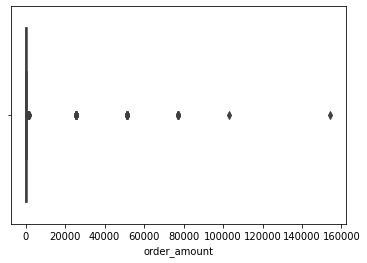

In [ ]:
sns.boxplot(x=df['order_amount'])

As we can see, there are still exceptionally high purchase orders that need explaining. We find the maximum non-outlier value (730) and explore entries with order amounts over 730

In [ ]:
Q1 = df['order_amount'].quantile(0.25)
Q3 = df['order_amount'].quantile(0.75)
IQR = Q3-Q1
low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR
print(up_bound)

730.5


In [ ]:
high_purchase = df[df['order_amount'] > 730]
high_purchase

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
99,100,18,752,780,5,cash,2017-03-06 23:41:16
136,137,15,961,765,5,credit_card,2017-03-26 5:06:46
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
219,220,23,884,780,5,credit_card,2017-03-03 20:11:05
222,223,96,829,765,5,debit,2017-03-13 15:16:25
...,...,...,...,...,...,...,...
4918,4919,78,823,25725,1,cash,2017-03-15 13:26:46
4927,4928,74,849,765,5,cash,2017-03-28 6:55:57
4952,4953,26,786,880,5,cash,2017-03-17 1:50:18
4958,4959,70,711,865,5,credit_card,2017-03-08 17:22:51


From a quick inspection, I noticed that shoes from shop 78 are either diamond encrusted or come with a free car. It looks like it's worth viewing AOV prices from each store.

In [ ]:
shop_dict = {}
for shop in sorted(df['shop_id'].unique()):
  temp = df[df['shop_id'] == shop]
  aov = temp['order_amount'].sum() / len(temp['order_amount'])
  shop_dict[shop] = aov

<BarContainer object of 100 artists>

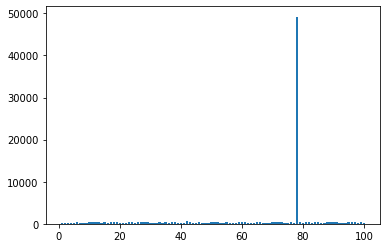

In [ ]:
plt.bar(*zip(*shop_dict.items()))

It's hard to see the other stores with the scaling, but clearly shop 78 is special. Below is the distribution without it

<BarContainer object of 99 artists>

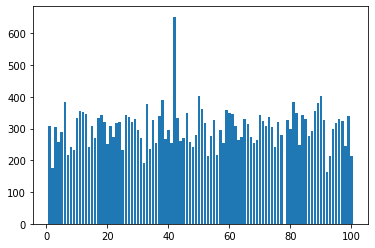

In [ ]:
shop_dict.pop(78)
plt.bar(*zip(*shop_dict.items()))

For the most part, the AOV of each store seems similar, but 42 is a bit high. Maybe there's a reason for it

In [ ]:
df[df['shop_id'] == 42]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
40,41,42,793,352,1,credit_card,2017-03-24 14:15:41
308,309,42,770,352,1,credit_card,2017-03-11 18:14:39
409,410,42,904,704,2,credit_card,2017-03-04 14:32:58
834,835,42,792,352,1,cash,2017-03-25 21:31:25
835,836,42,819,704,2,cash,2017-03-09 14:15:15
938,939,42,808,1056,3,credit_card,2017-03-13 23:43:45
979,980,42,744,352,1,debit,2017-03-12 13:09:04
1364,1365,42,797,1760,5,cash,2017-03-10 6:28:21
1367,1368,42,926,1408,4,cash,2017-03-13 2:38:34
1471,1472,42,907,1408,4,debit,2017-03-12 23:00:22


The higher order values are explained by the ordering of multiple items and the fact that shoes from shop 42 are rather expensive (but not un-naturally so). From the box chart of total_items below, anything below 6 items is a relatively normal purchase. (While 8 pairs is an outlier, intuitively I don't think 8 pairs is an extraordinary purchase, especially for family purchases)

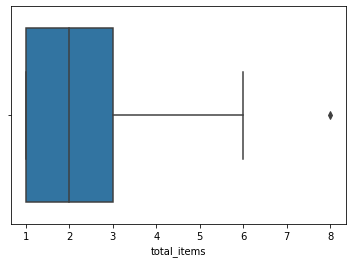

In [ ]:
sns.boxplot(x=df['total_items'])

Filtering out shop 78 orders, we find that the AOV is $302

In [ ]:
df = df[df['shop_id'] != 78 ]
df['order_amount'].sum() / len(df['order_amount'])

302.58051448247926

This is looking closer to what I would expect. Let's make another boxplot to view our progress

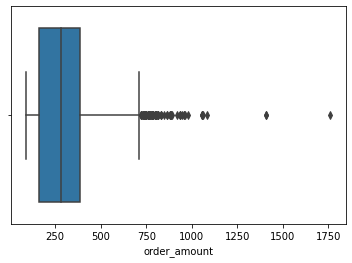

In [ ]:
sns.boxplot(x=df['order_amount'])

This is looking pretty good. The "outlier" values can be explained by the purchasing of multiple items. From the description of the order_amounts below, the minimum order amount is 90. It is safe to say there is nothing artificially lowering the AOV

In [ ]:
df['order_amount'].describe()

count    4937.000000
mean      302.580514
std       160.804912
min        90.000000
25%       163.000000
50%       284.000000
75%       387.000000
max      1760.000000
Name: order_amount, dtype: float64

All things considered, I think taking the median is a more comprehensive metric when assessing the value of shoes sold. As such, the value of the metric I would report is **$284**

### Final comments
a. 
- First of all, user 607's orders should be removed since they are clearly not reflective of typical customer behavior
- Orders from store 78 should be removed.
  - Assuming store 78 is a luxury store, purchases from store 78 should be evaluated separately rather than jumbled with the rest of the stores.

b.
- The metric that most effectively portrays expected customer order amounts would be the median. While purchasing 4-8 pairs of shoes isn't unheard of, a mass majority will tend to purchase 1-2 pairs of shoes. As such, I opted to use the median, a metric more robust against extreme values.

c.
- The value I would choose to report is $284.00

# Question 2

a. 
```
SELECT COUNT(ShipperName) 
FROM [Orders] 
LEFT JOIN Shippers ON Orders.ShipperID = Shippers.ShipperID 
WHERE ShipperName=='Speedy Express'

>>>  54
```

b.
```
SELECT LastName
FROM [Orders] 
LEFT JOIN Employees ON Orders.EmployeeID = Employees.EmployeeID 
GROUP BY LastName
ORDER BY COUNT(*) DESC
LIMIT 1

>>> Peacock
```

c.
```
FROM [Orders] 
LEFT JOIN Customers ON Orders.CustomerID = Customers.CustomerID 
LEFT JOIN OrderDetails ON Orders.OrderID = OrderDetails.OrderID
WHERE Country == 'Germany'
GROUP BY ProductID
ORDER BY COUNT(*) DESC
LIMIT 1

>>> 31

SELECT ProductName FROM [Products]
WHERE ProductID == 31

>>> Gorgonzola Telino
```